In [3]:
#importing the necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

### The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### Q1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [5]:
df=pd.read_csv("zomato.csv",encoding="ISO-8859-1")

df.columns

# number of restaurants in Delhi-NCR
cities=["New Delhi","Ghaziabad","Noida","Gurgaon","Faridabad"]
value_NCR=df["City"].isin(cities).sum()
# print(value_NCR)
#number of restaurants not in Delhi-NCR
value_nonNCR=0
ncr=0
for i in df.index:
#     print(df["Country Code"][i])
    if df["Country Code"][i]==1:
        if df["City"][i] not in cities:
            value_nonNCR=value_nonNCR+1
        else:
            ncr+=1
            
            
        
print("The total number of  restaurants in Delhi-NCR is "+ str(ncr))
print("The total number of  restaurants in rest of India is "+str(value_nonNCR))

The total number of  restaurants in Delhi-NCR is 7947
The total number of  restaurants in rest of India is 705


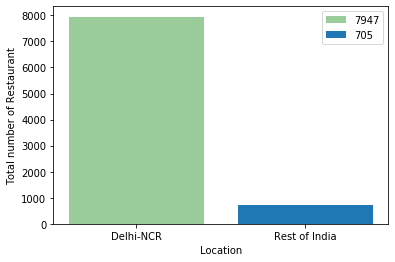

In [6]:
#plotting the graph
fig=plt.figure()
x=["Delhi-NCR","Rest of India"]
y=[ncr,value_nonNCR]
plt.bar(x[0],y[0],color="g",alpha=0.4)
plt.bar(x[1],y[1])
plt.xlabel("Location")
plt.ylabel("Total number of Restaurant")
plt.legend(y)
plt.show()


### Q2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [7]:
dict_Delhi={}
dict_roi={}
delhi=[]
roi=[]
#Creating Dictionary for storing the different types of cuisines, could have also been done using set
cities=["New Delhi","Ghaziabad","Noida","Gurgaon","Faridabad"]
for i in df.index:
    if df["Country Code"][i]==1:
        if df["City"][i] not in cities:
            type_arr=[x.strip() for x in df["Cuisines"][i].strip().split(",")]
            for name in type_arr:
                dict_roi[name]=dict_roi.get(name,0)+1
                roi.append(name)
        else:
            type_arr=[x.strip() for x in df["Cuisines"][i].strip().split(",")]
            for name in type_arr:
                dict_Delhi[name]=dict_Delhi.get(name,0)+1
                delhi.append(name)
                
            
delhi_cuisines=set(delhi)
roi_cuisines=set(roi)

In [8]:
not_common=[]
for i in roi_cuisines:
    if i not in delhi_cuisines:
        not_common.append(i)

In [9]:
#the cuisines not present in Delhi but present in Rest of India are 
for i in not_common:
    print(i)

German
Cajun
Malwani
BBQ


#### checking through API

In [205]:
#Next we call the Zomata API to find out which cuisines are actually served in Delhi -NCR , the city_id of Delhi -NCR 
#is 1
#Using the acces token we will fetch data from zomato API
headers = {'user-key':'3a93e511d6b62cf9ecac9f642d279c3c'}
data = {'city_id':'1'}
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers = headers,params = data)
cuisines_list = res.json()['cuisines']

cuisine_set=set()
for i in cuisines_list:
    cuisine_set.add(i['cuisine']['cuisine_name'])

#Finding the final answer by subtracting the 
cuisine_present = set(not_common)-(roi_cuisines  - cuisine_set)
for i in cuisine_present:
    print(i)


BBQ
Malwani


### <span style="color: green;">Conclusion: This means that BBQ,Malwani Cuisines are actual served in Delhi-NCR but the dataset is incomplete</span> 

### Q1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [44]:
df=pd.read_csv("zomato.csv",encoding="ISO-8859-1")

df.columns
dict_Delhi={}
dict_roi={}
# We will ainatain two seperate list to store names of cuisines
delhi=[]
roi=[]
#Creating Dictionary for storing the different types of cuisines, could have also been done using set
cities=["New Delhi","Ghaziabad","Noida","Gurgaon","Faridabad"]
for i in df.index:
    if df["Country Code"][i]==1:
        if df["City"][i] not in cities:
            type_arr=[x.strip() for x in df["Cuisines"][i].strip().split(",")]
            for name in type_arr:
                dict_roi[name]=dict_roi.get(name,0)+1
                roi.append(name)
        else:
            type_arr=[x.strip() for x in df["Cuisines"][i].strip().split(",")]
            for name in type_arr:
                dict_Delhi[name]=dict_Delhi.get(name,0)+1

dictionary_delhi= sorted(dict_Delhi,key=dict_Delhi.get,reverse=True)
dictionary_ROI= sorted(dict_roi,key=dict_roi.get,reverse=True)
value_ncr=[]
name_ncr=[]
for i in dictionary_delhi[:10]:
    print(i,dict_Delhi[i])
    value_ncr.append(dict_Delhi[i])
    name_ncr.append(i)
    
print("*********------------------------------------------------------------*****")
value_roi=[]
name_roi=[]
for i in dictionary_ROI[:10]:
    print(i,dict_roi[i])
    value_roi.append(dict_roi[i])
    name_roi.append(i)

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
*********------------------------------------------------------------*****
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


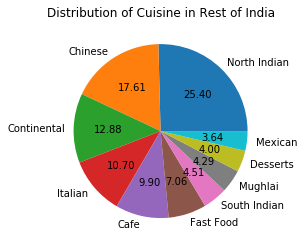

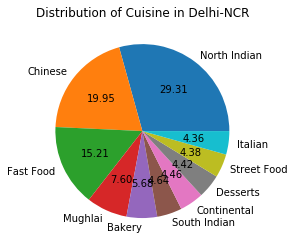

In [46]:
# we will use the values as obtained from the previous question

plt.pie(value_roi,labels=name_roi,autopct='%0.2f')
plt.title('Distribution of Cuisine in Rest of India')
plt.show()
plt.pie(value_ncr,labels=name_ncr,autopct='%0.2f')
plt.title('Distribution of Cuisine in Delhi-NCR')
plt.show()

## <span style="color: Red;">Inference: 
        1. North Indian is the most common cuisine in both north india and rest of india
        2. Continental is quite popular amongst Rest of India
        3. Italian is less popular amongst NCR

</span>
 

### Part-2 User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

### 2.1Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

### 2.1.1 Number of Votes given Restaurant

In [47]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [54]:
#reading the dataset
df=pd.read_csv("zomato.csv",encoding="ISO-8859-1")

df.columns
df=df[df["Country Code"]==1]

In [58]:
x = df['Votes'].values
y = df['Aggregate rating'].values

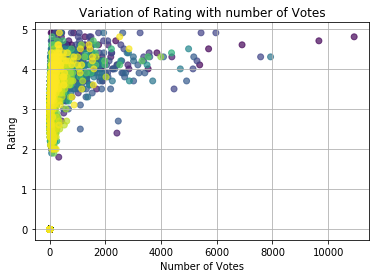

In [61]:

colors = np.arange(len(x))
plt.grid()
plt.scatter(x,y,c=colors,alpha=0.7)
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Variation of Rating with number of Votes')
plt.show()

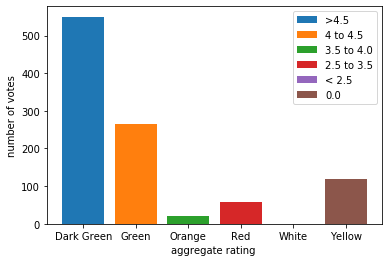

In [303]:
# The Rating Colour are in Proportion to the Ratings of the restaurant 
X=df.groupby("Rating color")["Votes"].median()
# colors = ("red","white","orange","yellow","green","darkgreen")
label=["0.0","< 2.5", "2.5 to 3.5", "3.5 to 4.0", "4 to 4.5",">4.5"][::-1]
for i in range(len(X)):
    plt.bar(X.index[i],X.values[i],label= label[i] )
plt.legend()
plt.ylabel("number of votes")
plt.xlabel("aggregate rating ")
plt.show()

In [62]:
#bivariate analysis
print("the correlation between votes and agrregate rating is ",df["Votes"].corr(df["Aggregate rating"],method='pearson'))


the correlation between votes and agrregate rating is  0.2876924089632165


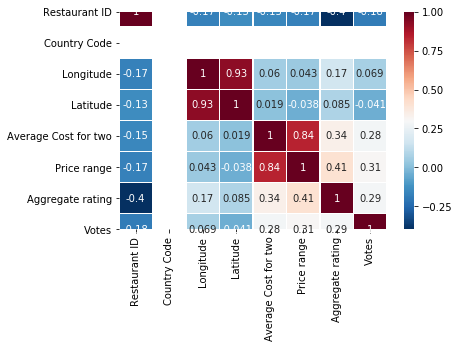

In [69]:
import seaborn as sns
pearsoncorr= df.corr(method='pearson')
sns.heatmap(pearsoncorr,xticklabels=pearsoncorr.columns,yticklabels=pearsoncorr.columns,cmap='RdBu_r',annot=True,linewidth=0.5)
plt.show()

#### The inference is there is no strong relation between the two values as the value of the pearson coefficient is 0.31, but since it is positive there is a weak relation that as number of votes increase, the rating increases
1. Number of resturants getting rating between 4 and 5 is maximum where the restaurant have votes between 0-2000 as in graph1
2. The retaurant with heighest number of votes have a rating close to 5.
3. Most restaurants receive votes between 0-2000

### Q2.1.2 Restaurant serving more number of cuisines.

In [71]:
df.columns


d={}
d2={}
df["Cuisines"]
df.dropna(subset = ["Cuisines"], inplace = True)
for i in df.index:
    key=len([x.strip() for x in df["Cuisines"][i].strip().split(",")])
    value2= df["Aggregate rating"][i]
    if key not in d:
        d[key]=[value2]
        
    elif key in d:
        d[key].append(value2)
        
        
# print(d)
# print(d2)
varities= list(d.keys())
aggregate_rating = (list(d.values()))
rating=[]
for i in aggregate_rating:
    rating.append(np.mean(i))

In [72]:
dictionary={"number_of_varieties":varities,"aggregate_rating":rating}


In [73]:
dataframe= pd.DataFrame(dictionary)
dataframe.sort_values(by=["number_of_varieties"])


,number_of_varieties,aggregate_rating
1,1,2.055086
0,2,2.563422
2,3,2.890539
3,4,3.379167
4,5,3.481290
5,6,3.651429
6,7,3.646154
7,8,3.266667


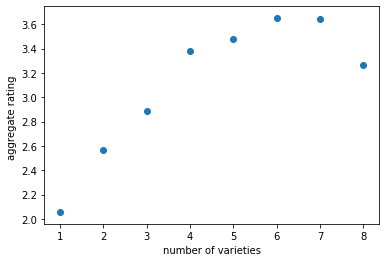

In [74]:
plt.figure()
plt.scatter(dataframe["number_of_varieties"],dataframe["aggregate_rating"])
plt.xlabel("number of varieties")
plt.ylabel("aggregate rating ")
plt.show()

#### Conclusion: AS seen from the graph as the number of varieties increase so does the Rating, except when the number of varities is more than 7

 ## Q2.3 Average Cost of Restaurant

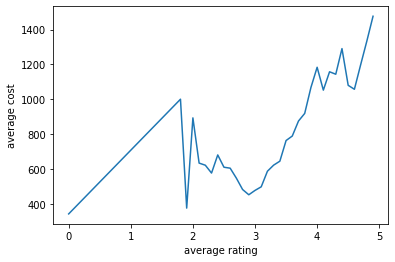

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

data  = pd.read_csv('zomato.csv', encoding = 'latin-1')
df = data

rating_cost = {}

for i in df.index:
    if df["Country Code"][i] == 1:
        if df["Aggregate rating"][i] in rating_cost:
            rating_cost[df["Aggregate rating"][i]].append(df["Average Cost for two"][i])
        else:
            rating_cost[df["Aggregate rating"][i]] = [df["Average Cost for two"][i]]

rating_cost
agg = []
avg_cost = []

for i in rating_cost:
    np_val = np.array(rating_cost[i])
    agg.append(i)
    avg_cost.append(np.mean(np_val))
    
ind_sort = np.argsort(agg)

sorted_rating = []
sorted_avg_cost = []

for i in ind_sort[::-1]:
    sorted_rating.append(agg[i])
    sorted_avg_cost.append(avg_cost[i])
    
plt.plot(sorted_rating, sorted_avg_cost)
plt.ylabel("average cost")
plt.xlabel("average rating")
plt.show()

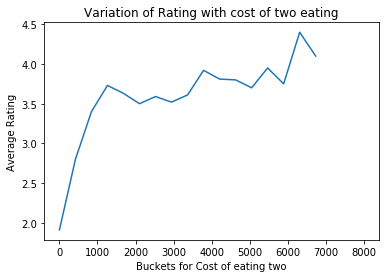

In [90]:
# To find out the relation between number of cusines served and the rating of the restaurant we will maitain two lists
#which will store the average rating of the restaurant and the cost of two eating 
cost_list=df['Average Cost for two'].values
rating_list = df['Aggregate rating'].values

min_cost = df['Average Cost for two'].min()
max_cost = df['Average Cost for two'].max()

# we will try to group the cost into buckets and then calculate the average rating of the bucket
# for creating 10 equally spaced buckets we use numpy function
buckets = np.linspace(min_cost,8000,20,dtype=int)

mean_list = []
for i in range(0,len(buckets)-1):
    cost_mean = df_india[(df_india['Average Cost for two']>= buckets[i])&(df_india['Average Cost for two']< buckets[i+1])]['Aggregate rating'].mean()
    mean_list.append(round(cost_mean,2))
#Taking into account for the cost more than the bucket max i.e 8000
mean_list.append(round(df_india[df_india['Average Cost for two']>= buckets[i+1]]['Aggregate rating'].mean(),2))
# We now plot a line graph of mean of ratings with our buckets array
plt.xlabel('Buckets for Cost of eating two')
plt.ylabel('Average Rating')
plt.title('Variation of Rating with cost of two eating')
plt.plot(buckets,mean_list)
plt.show()

## Inferences:
from fig1:
The figure 1 works on the average cost for each rating but no specific conclusions could be drawn , so instead of taking all the extremes in costs, we took only the costs which were frequent based on buckets as in figure 2
from fig2:
1. The maximum rating is acheived for restaurant having cost of two between 6000-7000
2. Rating between 4 -5 is given to restaurants those who have cost of two between 4000-8000.
3. There is no direct praportional relation between cost of two persons eating and the rating given to the restaurant.

### Q2.4 Restaurant serving some specific cuisines. 

Asian 3.74516129032258
Thai 3.6004878048780484
Continental 3.5078729281767953
Italian 3.500586510263929
American 3.4120000000000004
Burger 3.2666666666666666
Cafe 3.2320574162679425
Desserts 2.858793969849246
Pizza 2.693290734824281
Beverages 2.649074074074074
Mughlai 2.605443548387097
Chinese 2.598884758364312
Fast Food 2.549719816607234
Ice Cream 2.5125
North Indian 2.505169792194627
South Indian 2.458954041204437
Biryani 2.4017142857142852
Bakery 2.3971074380165294
Street Food 2.328880866425993
Mithai 2.0736842105263156


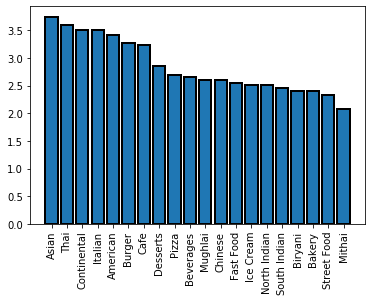

In [302]:
#code to find the top 20 most ordered dishes

dict_roi={}

df.dropna(subset = ['Cuisines','Aggregate rating'], inplace = True)
#Creating Dictionary for storing the different types of cuisines, could have also been done using set
for i in df.index:
    if df["Country Code"][i]==1:
            type_arr=[x.strip() for x in df["Cuisines"][i].strip().split(",")]
            for name in type_arr:
                dict_roi[name]=dict_roi.get(name,0)+1

dictionary_ROI= sorted(dict_roi,key=dict_roi.get,reverse=True)
top_cuisine=[]
for i in dictionary_ROI[:20]:
#     print(i,dict_roi[i])
    top_cuisine.append(i)
    
dictionary_restaurant_cuisine={}
for i in df.index:
    if df["Country Code"][i]==1:
#         if df.Votes[i] != 0:
            rating= df["Aggregate rating"][i]
            for j in [x.strip() for x in df["Cuisines"][i].strip().split(",")]:
                if j in top_cuisine:
                    if j not in dictionary_restaurant_cuisine:
                        dictionary_restaurant_cuisine[j]=[rating]
                    elif j in dictionary_restaurant_cuisine:
                        dictionary_restaurant_cuisine[j].append(rating)

d_rating={}
for i in dictionary_restaurant_cuisine:
    d_rating[i]=np.mean(dictionary_restaurant_cuisine[i])

sort_rating=sorted(d_rating,key=d_rating.get,reverse=True)
x=[]
y=[]
for i in sort_rating[:20]:
    print(i,d_rating[i])
    x.append(i)
    y.append(d_rating[i])


plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.bar(x,y,linewidth=2,edgecolor='black')


plt.show()




### <span style="color: Red;"> inference:
### <span style="color: Red;">   1. Asian is the most popular cuisine in India </span>
### <span style="color: Red;">2. The indian favourites like Mithai ,Biryanis are quite popular as expected</span>
### <span style="color: Red;">3. International Cuisines like Italian and Chinese are quite popular</span>

## Q2.Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("zomato.csv",encoding='latin-1')

df.dropna(subset=["Locality","Aggregate rating","Votes"],inplace=True)
df.columns
df=df[df["Country Code"]==1]



d1={}
d2={}
for i in df.index:
    key=df["Locality"][i]
    if key not in d1:
        d1[key]=df["Votes"][i]*df["Aggregate rating"][i]
        d2[key]=df["Votes"][i]
    elif key in d1:
        d1[key]+=df["Votes"][i]*df["Aggregate rating"][i]
        d2[key]+=df["Votes"][i]





result={}
for i in d1:
    if d2[i]!=0:
        result[i]=  d1[i]/d2[i]
arr=sorted(result,key=result.get,reverse=True)
names=[]
ratings=[]

for i in arr[:10]:
    names.append(i)
    ratings.append(result[i])
    
    print(i,result[i])


Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Banjara Hills 4.7187617260787995
Sector 5, Salt Lake 4.707022552098202
Riverside Mall, Gomti Nagar 4.7


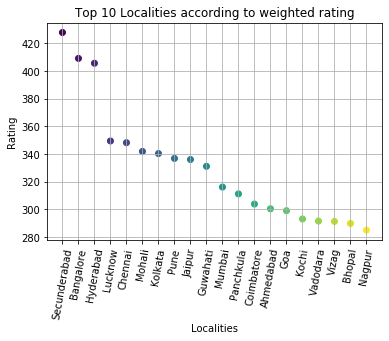

In [301]:
colors = np.linspace(0,len(names),20)
plt.scatter(names,ratings,c=colors)
plt.xlabel('Localities')
plt.xticks(rotation = 80)
plt.ylabel('Rating')
plt.title('Top 10 Localities according to weighted rating')
plt.grid()
plt.show()

### Q3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

In [157]:
#Approach: maintain a dictionary of restaurants, maintain a count of those restaurants and plot the frequency as a Bar graph
#reading the dataset
df=pd.read_csv("zomato.csv",encoding="ISO-8859-1")
#keeping only India with code1
df=df[df["Country Code"]==1]
restaurant={}
for i in df.index:
    key= df['Restaurant Name'][i]
    restaurant[key]=restaurant.get(key,0)+1
arr=sorted(restaurant,key=restaurant.get,reverse=True)

name=[]
number=[]
for i in arr[:15]:
    name.append(i)
    number.append(restaurant[i])
    print(i,restaurant[i])

Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
McDonald's 48
Keventers 34
Pizza Hut 29
Giani 29
Baskin Robbins 28
Barbeque Nation 25
Dunkin' Donuts 22
Giani's 22
Barista 22
Pind Balluchi 20
Costa Coffee 20


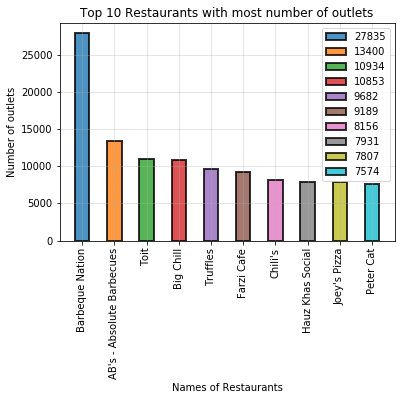

In [298]:
colors = ["red",]
for i in range(len(number)):
    plt.bar(height = number[i],x=name[i],width=0.45,alpha=0.8,linewidth=2,edgecolor='black')

plt.xlabel('Names of Restaurants')
plt.xticks(rotation = 90)
plt.grid(alpha=0.4)
plt.ylabel('Number of outlets')
plt.title('Top 10 Restaurants with most number of outlets')
plt.legend(number)
plt.show()

### 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant)

In [149]:
### Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant)
#Approach: maintain a dictionary of restaurants,get the average rating for the restaurant and plot the frequency as a Bar graph
#reading the dataset
df=pd.read_csv("zomato.csv",encoding="ISO-8859-1")
#keeping only India with code1
df=df[df["Country Code"]==1]
df.dropna(subset=["Aggregate rating"],inplace=True)
restaurant={}
for i in df.index:
    key= df['Restaurant Name'][i]
    value= df["Aggregate rating"][i]
    if key in restaurant:
        restaurant[key].append(value)
    else:
        restaurant[key]=[value]


In [150]:
avg_ratings={}
for i in restaurant:
    avg_ratings[i]=np.mean(restaurant[i])

In [151]:
arr=sorted(avg_ratings,key=restaurant.get,reverse=True)


In [154]:
name=[]
number=[]
for i in arr[:15]:
    name.append(i)
    number.append(restaurant[i])
    print(i,avg_ratings[i])

Naturals Ice Cream 4.800000000000001
Sheroes Hangout 4.9
Sagar Gaire Fast Food 4.9
CakeBee 4.9
The Great Indian Pub 4.9
Caterspoint 4.9
Zolocrust - Hotel Clarks Amer 4.9
Grandson of Tunday Kababi 4.9
Mirchi And Mime 4.9
Indian Accent - The Manor 4.9
Masala Library 4.9
Matchbox 4.4
Toit 4.8
Burger Factory 4.8
Prankster 4.8


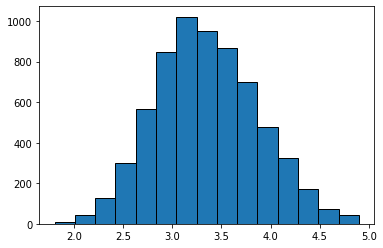

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.pyplot as plt
data=pd.read_csv('zomato.csv', encoding = 'latin-1')
d=OrderedDict()
data=data[data['Country Code']==1]
data.replace('Faridabad','Delhi-NCR',inplace=True)
data.replace('Ghaziabad','Delhi-NCR',inplace=True)
data.replace('Gurgaon','Delhi-NCR',inplace=True)
data.replace('New Delhi','Delhi-NCR',inplace=True)
data.replace('Noida','Delhi-NCR',inplace=True)
l=[]
for i in range(len(data)):
    k=data['Aggregate rating'].iloc[i]
    if k!=0.0:
        l.append(k)
    d[k]=d.get(k,0)+1
x=list(d.keys())
y=list(d.values())
plt.hist(l,bins=15,edgecolor='black')
plt.show()

### 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

In [281]:
#Approach: maintain a dictionary of restaurants, maintain a count of those restaurants and plot the frequency as a Bar graph
#reading the dataset
df=pd.read_csv("zomato.csv",encoding="ISO-8859-1")
#keeping only India with code1
df=df[df["Country Code"]==1]
restaurant={}
for i in df.index:
    key= df['Restaurant Name'][i]
    value=df['Votes'][i]
    restaurant[key]=restaurant.get(key,0)+value
arr=sorted(restaurant,key=restaurant.get,reverse=True)

name=[]
number=[]
for i in arr[:10]:
    name.append(i)
    number.append(restaurant[i])
    print(i,restaurant[i])

Barbeque Nation 27835
AB's - Absolute Barbecues 13400
Toit 10934
Big Chill 10853
Truffles 9682
Farzi Cafe 9189
Chili's 8156
Hauz Khas Social 7931
Joey's Pizza 7807
Peter Cat 7574


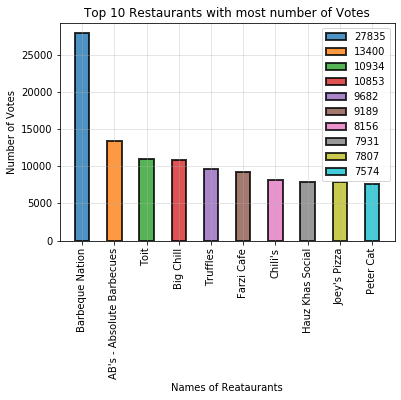

In [293]:
colors = ["red",]
for i in range(len(number)):
    plt.bar(height = number[i],x=name[i],width=0.45,alpha=0.8,linewidth=2,edgecolor='black')

plt.xlabel('Names of Reataurants')
plt.xticks(rotation = 90)
plt.grid(alpha=0.4)
plt.ylabel('Number of Votes')
plt.title('Top 10 Restaurants with most number of Votes')
plt.legend(number)
plt.show()

### 3.4Plot the pie graph of top 10 cuisines present in restaurants in the USA

In [195]:
#reading the dataset
df=pd.read_csv("zomato.csv",encoding="ISO-8859-1")
df.dropna(subset=["Cuisines"],inplace=True)

df.columns
df_us= df[df["Country Code"]==216]


In [196]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [203]:
cuisine_count={}
for i in df_us.index:
    type_arr=[x.strip() for x in df_us["Cuisines"][i].strip().split(",")]
    for key in type_arr:
        cuisine_count[key]=cuisine_count.get(key,0)+1

arr=sorted(cuisine_count,key=cuisine_count.get,reverse=True)

name=[]
count=[]
for i in arr[:10]:
    name.append(i)
    count.append(cuisine_count[i])
    print(i,cuisine_count[i])

American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


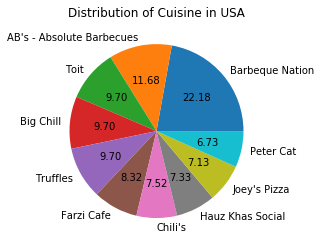

In [295]:
# we will use the values as obtained from above
plt.pie(count,labels=name,autopct='%0.2f')
plt.title('Distribution of Cuisine in USA')
plt.show()

### 3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

Secunderabad 4.548054679284963 2
Bangalore 4.497423148890671 20
Hyderabad 4.487772943857468 18
Lucknow 4.3235268346111715 21
Chennai 4.319682253114281 20
Mohali 4.3 1
Kolkata 4.295151705424619 20
Pune 4.2839957553540415 20
Jaipur 4.281507965242579 20
Guwahati 4.265733279613215 21
Mumbai 4.2166077381553695 20
Panchkula 4.2 1
Coimbatore 4.174994074425219 20
Ahmedabad 4.163215392140877 21
Goa 4.158438203735593 20
Kochi 4.137380191693291 20
Vadodara 4.131989247311829 20
Vizag 4.131187061336588 20
Bhopal 4.1259297879735835 20
Nagpur 4.10865162037037 20


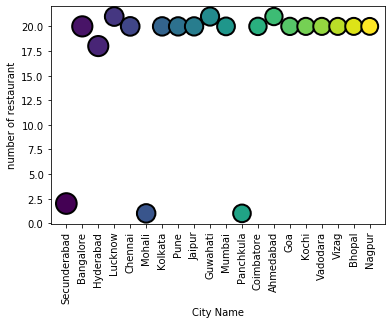

In [270]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("zomato.csv",encoding='latin-1')

df.dropna(subset=["Locality","Aggregate rating","Votes"],inplace=True)
df.columns
df=df[df["Country Code"]==1]



d1={}#to maintain 
d2={}#to maintain votes in each city
d3={}#to maintain city count
for i in df.index:
    key=df["City"][i]
    if df["Votes"][i]!=0:
        if key not in d1:
            d1[key]=df["Votes"][i]*df["Aggregate rating"][i]
            d2[key]=df["Votes"][i]
            d3[key]=1
        elif key in d1:
            d1[key]+=df["Votes"][i]*df["Aggregate rating"][i]
            d2[key]+=df["Votes"][i]
            d3[key]+=1




result={}
for i in d1:
    if d2[i]!=0:
        result[i]=  d1[i]/d2[i]
arr=sorted(result,key=result.get,reverse=True)
names=[]
ratings=[]
number_present=[]
for i in arr[:20]:
    names.append(i)
    ratings.append(result[i]**4)## to improve visualisation 
    number_present.append(d3[i])
    print(i,result[i],d3[i])
#PLOTTING THE SCATTER/BUBBLE GRAPH

colors = np.linspace(0,len(names),20)
plt.scatter(x=names,y=number_present,s=ratings,c=colors,linewidth=2,edgecolor='black')
plt.xticks(rotation = 90)
plt.xlabel("City Name")
plt.ylabel("number of restaurant")
plt.show()